In [1]:
import pandas as pd
import numpy as np
import re

In [3]:
import jieba 
import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [4]:
jjj = pd.read_csv('jjj.csv')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
jjj.head()

,I_SECURITYID,S_CHECKDEPARTMENT,S_CHECKPERSON,D_CHECKDATE,S_RESPONSIBILITYDEPT,S_PROMBLEMNATURE,S_RISKCLASSIFY,S_RISKPOINT,S_AUDITPERSON,S_RESPONSIBLEPERSON,...,S_MODIFYMEASURE,I_APPLICATIONSTATE,S_APPLICATIONREASON,D_APPLICATIONTTIME,S_EMPLOYEECODE,S_FINALLEVEL,S_FINALSCORE,S_WEIGHTSCORE,I_CHANGESTATE,S_FOLLOWSTATUS
0,1687,信息科,杨若愚,2015-08-03 17:15:00,售票车间,一般问题,售票,BZ96,NaN,韩晶,...,职工安全责任意识不到位，要求切实做好离口将票款锁入金柜的制度，确保安全。,0,NaN,2015-01-07 00:00:00,100702.0,NaN,NaN,NaN,0.0,NaN
1,1688,信息科,杨若愚,2015-08-03 17:20:00,客运车间,一般问题,客运,BZ89,NaN,站台甲班,...,按规定要求立岗进行乘降组织。,0,NaN,2015-01-07 00:00:00,100702.0,NaN,NaN,NaN,0.0,NaN
2,1419,安全科,杨晓宁,2015-07-30 05:47:00,售票车间,一般问题,售票,BZ96,NaN,肖晶,...,要求职工规范作业标准，将现金及时入柜，确保票款的绝对安全。,0,NaN,2015-01-07 00:00:00,100209.0,NaN,NaN,NaN,0.0,NaN
3,1424,安全科,杜贤,2015-07-30 06:15:00,设备车间,一般问题,设备管理,BZ186,NaN,奥迪斯、金科,...,奥迪斯与金科公司负责人认真吸取教训，加强检查,0,NaN,2015-01-07 00:00:00,100201.0,NaN,NaN,NaN,0.0,NaN
4,1421,客运车间,杨谦,2015-07-29 21:40:00,客运车间,一般问题,客运,BZ85,NaN,客运甲班,...,1、按照作业流程，做好检票前的准备工作；\n2、候车室值班员到岗后进行检点，督促职工按流程作业。,0,NaN,2015-01-07 00:00:00,101301.0,NaN,NaN,NaN,0.0,NaN


In [13]:
rows= [row for row in jjj]
print rows

['I_SECURITYID', 'S_CHECKDEPARTMENT', 'S_CHECKPERSON', 'D_CHECKDATE', 'S_RESPONSIBILITYDEPT', 'S_PROMBLEMNATURE', 'S_RISKCLASSIFY', 'S_RISKPOINT', 'S_AUDITPERSON', 'S_RESPONSIBLEPERSON', 'I_AUDITSTATE', 'I_MODIFYSTATE', 'D_ENTRYTIME', 'S_CHECKAREA', 'S_PROBLEMTYPE', 'S_CHECKWAY', 'S_HANDLEREASULT', 'S_TASKLINK', 'I_QUALITYDAY', 'I_QUALITYMONTH', 'S_PROBLEMDESCRIPTION', 'S_LEADERDEPT', 'S_REASULTANALYSIS', 'S_MODIFYMEASURE', 'I_APPLICATIONSTATE', 'S_APPLICATIONREASON', 'D_APPLICATIONTTIME', 'S_EMPLOYEECODE', 'S_FINALLEVEL', 'S_FINALSCORE', 'S_WEIGHTSCORE', 'I_CHANGESTATE', 'S_FOLLOWSTATUS']


In [14]:
for line in jjj:  
    print line 

I_SECURITYID
S_CHECKDEPARTMENT
S_CHECKPERSON
D_CHECKDATE
S_RESPONSIBILITYDEPT
S_PROMBLEMNATURE
S_RISKCLASSIFY
S_RISKPOINT
S_AUDITPERSON
S_RESPONSIBLEPERSON
I_AUDITSTATE
I_MODIFYSTATE
D_ENTRYTIME
S_CHECKAREA
S_PROBLEMTYPE
S_CHECKWAY
S_HANDLEREASULT
S_TASKLINK
I_QUALITYDAY
I_QUALITYMONTH
S_PROBLEMDESCRIPTION
S_LEADERDEPT
S_REASULTANALYSIS
S_MODIFYMEASURE
I_APPLICATIONSTATE
S_APPLICATIONREASON
D_APPLICATIONTTIME
S_EMPLOYEECODE
S_FINALLEVEL
S_FINALSCORE
S_WEIGHTSCORE
I_CHANGESTATE
S_FOLLOWSTATUS


In [19]:
jjj.S_CHECKDEPARTMENT

0             信息科
1             信息科
2             安全科
3             安全科
4            客运车间
5            客运车间
6             安全科
7            客运车间
8            客运车间
9             客运科
10            安全科
11            安全科
12            安全科
13            办公室
14       职工教育培训中心
15          党群办公室
16           行包车间
17           运转车间
18            客运科
19          党群办公室
20            安全科
21            安全科
22            安全科
23           行包车间
24           行包车间
25            安全科
26            安全科
27           行包车间
28           设备车间
29            站领导
           ...   
35425        运转车间
35426         信息科
35427        运转车间
35428       劳动人事科
35429         安全科
35430         安全科
35431       党群办公室
35432         站领导
35433        客运科 
35434         客运科
35435         客运科
35436         站领导
35437         客运科
35438         站领导
35439        运转车间
35440        运转车间
35441        运转车间
35442        运转车间
35443         财务科
35444        行包车间
35445        行政监察
35446         安全科
35447         安全科
35448         安全科
35449     

In [20]:
jjj.S_PROBLEMDESCRIPTION

0                     视频回放发现8月2日6:18票一厅8号窗口售票员离口后桌上有现金未入柜。
1              视频回放发现8月3日6:51分二三站台南行包客运员于6818检票期间坐在南行包台子上。
2                          售票一厅5号口，售票员离口后放在制票机上的售票现金未入柜。  
3        6:15分检查进站及出站电梯情况，发现进站1号与2号下部之间盖板不密贴且梳齿板有缺少，维保公...
4        视频回放查，7月27日21:48分，K1398次检票作业，检票组未提前开启南踏步检票门就进行...
5           视频回放查，7月28日23:24分，K237次刚停止检票，第三候车室灯就关闭，违反作业流程。
6        6:25分检查奥的斯电梯维修登记本中，登记的维修项目中，日期等内容填写不规范，设备车间监管不到位。
7        7:40，检查候车四厅旅客留言簿笔使用情况，仍不能用。此问题29日晚接班后即指出，但仍未更换...
8                       5:06分指挥中心漏报K1116次停检通告，经提醒后播报。(张妍彬)
9        18：41，候车三厅显示屏显示“1551次准备检票”，旅客站起排队，秩序乱，厅内无人宣传，服...
10       21:55分，视频回放29日3:17分，站6道列车已停妥，防溜人员3:19分到场，防溜人员晚出场。
11       22:15分，视频回放29日5:52分，站6道调车作业，试拉时甲调调车长低头，未认真确认试拉环节。
12       0:10分，车站利用天窗施工，在站内9、10道间铺设石板路，存在问题：一是车间施工准备工作不...
13               保洁人员一站台南踏步附近由北向南推垃圾车行进，未按要求将垃圾车盖儿盖上，违反规定。
14       11：46分，一站台南端行包行李装卸人员列队准备接1552，一名装卸人员长时间坐在背后拖车上...
15              视频回放发现：17：15分，K962次开车，南1位上水员与检车人员聊天，且背手送车。
16            检查到达库时发现:电梯司机将电梯让一名无操作证人员使用，违反特种设备使用规定，红卡考

In [5]:
lines = jjj['S_PROBLEMDESCRIPTION']

In [7]:
lines = lines.tolist()

In [9]:
type(lines)

list

In [7]:
lines[:5]

NameError: name 'lines' is not defined

In [5]:
clean_lines = []
for sentence in lines:
    if sentence is np.nan:
        continue
    clean_lines.append(re.sub('\d*','',sentence))

NameError: name 'lines' is not defined

In [6]:
clean_lines[0:6]

[]

In [34]:
key_word = []
for sentence in clean_lines:
    key_word.append(jieba.analyse.extract_tags(sentence,topK=5,withWeight=False,allowPOS=()))

In [28]:
key_word

[['离口', '未入', '一厅', '售票员', '回放'],
 ['南行', '客运员', '检票', '台子上', '回放'],
 ['售票', '制票', '离口', '未入', '一厅'],
 ['进站', '电梯', '梳齿', '检查', '及出'],
 ['检票', '作业', '组未', '预检', '踏步'],
 ['次刚', '检票', '候车室', '回放', '视频'],
 ['维修', '登记本', '奥的斯', '填写', '电梯'],
 ['留言簿', '日晚', '四厅', '标化', '候车'],
 ['张妍彬', '漏报', '停检', '播报', '通告'],
 ['无人', '三厅', '检票', '值守', '候车'],
 ['防溜', '停妥', '人员', '回放', '到场'],
 ['试拉时', '试拉', '调调', '调车', '回放'],
 ['车间', '拖车', '行包', '施工', '装车'],
 ['垃圾车', '保洁', '踏步', '盖儿', '违反规定'],
 ['装卸', '行包', '接车', '人员', '进站'],
 ['背手', '检车', '送车', '水员', '南位'],
 ['电梯', '操作证', '红卡', '库时', '特种设备'],
 ['调库', '立岗', '车长', '按规定'],
 ['休室', '踏步', '手推车', '站台', '垂直于'],
 ['水员站', '间接', '立岗', '进道', '高架'],
 ['售票', '二厅', '停售', '牌子', '工作人员'],
 ['包处', '保洁', '垃圾车', '手推', '新创'],
 ['立岗', '道次', '进站', '南行', '站台'],
 ['同位素', '放射性', '作业', '卸上', '次时'],
 ['作业', '装卸', '行包', '装完', '装卸工'],
 ['点名', '站长', '会时', '试问', '规章'],
 ['应答', '车长', '汇报', '乙调库', '连结'],
 ['电梯', '锁闭', '作业', '司机', '到达'],
 ['停放', '保洁', '回放', '站台', '小屋'],
 ['DF', '更换', '车组', '甲调

In [35]:
key= [item for sub_list in key_word for item in sub_list]

In [36]:
key

['离口',
 '未入',
 '一厅',
 '售票员',
 '回放',
 '南行',
 '客运员',
 '检票',
 '台子上',
 '回放',
 '售票',
 '制票',
 '离口',
 '未入',
 '一厅',
 '进站',
 '电梯',
 '梳齿',
 '检查',
 '及出',
 '检票',
 '作业',
 '组未',
 '预检',
 '踏步',
 '次刚',
 '检票',
 '候车室',
 '回放',
 '视频',
 '维修',
 '登记本',
 '奥的斯',
 '填写',
 '电梯',
 '留言簿',
 '日晚',
 '四厅',
 '标化',
 '候车',
 '张妍彬',
 '漏报',
 '停检',
 '播报',
 '通告',
 '无人',
 '三厅',
 '检票',
 '值守',
 '候车',
 '防溜',
 '停妥',
 '人员',
 '回放',
 '到场',
 '试拉时',
 '试拉',
 '调调',
 '调车',
 '回放',
 '车间',
 '拖车',
 '行包',
 '施工',
 '装车',
 '垃圾车',
 '保洁',
 '踏步',
 '盖儿',
 '违反规定',
 '装卸',
 '行包',
 '接车',
 '人员',
 '进站',
 '背手',
 '检车',
 '送车',
 '水员',
 '南位',
 '电梯',
 '操作证',
 '红卡',
 '库时',
 '特种设备',
 '调库',
 '立岗',
 '车长',
 '按规定',
 '休室',
 '踏步',
 '手推车',
 '站台',
 '垂直于',
 '水员站',
 '间接',
 '立岗',
 '进道',
 '高架',
 '售票',
 '二厅',
 '停售',
 '牌子',
 '工作人员',
 '包处',
 '保洁',
 '垃圾车',
 '手推',
 '新创',
 '立岗',
 '道次',
 '进站',
 '南行',
 '站台',
 '同位素',
 '放射性',
 '作业',
 '卸上',
 '次时',
 '作业',
 '装卸',
 '行包',
 '装完',
 '装卸工',
 '点名',
 '站长',
 '会时',
 '试问',
 '规章',
 '应答',
 '车长',
 '汇报',
 '乙调库',
 '连结',
 '电梯',
 '锁闭',
 '作业',
 '司机',
 '到达',
 

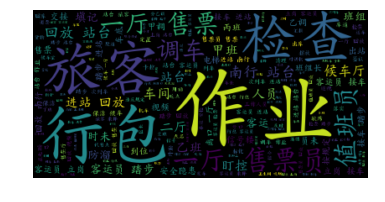

In [65]:
word = ""
for k in key:
    word += k
    word +=" "
#lower max font_size
font = '/usr/share/fonts/truetype/ubuntu-font-family/ukai.ttc'
wordcloud = WordCloud(max_font_size=100,font_path=font).generate(word)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(1200,10))
plt.show()

In [27]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.865 seconds.
Prefix dict has been built succesfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学


In [28]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

Default Mode: 我/ 来到/ 北京/ 清华大学


In [44]:
jjj_list = jieba.cut("视频回放发现8月2日6:18票一厅8号窗口售票员离口后桌上有现金未入柜。", cut_all=False)
print("Default Mode: " + "/ ".join(jjj_list)) 
jjj_list = jieba.cut("视频回放发现8月3日6:51分二三站台南行包客运员于6818检票期间坐在南行包台子上。", cut_all=False)
print("Default Mode: " + "/ ".join(jjj_list)) 
jjj_list = jieba.cut("售票一厅5号口，售票员离口后放在制票机上的售票现金未入柜。", cut_all=False)
print("Default Mode: " + "/ ".join(jjj_list)) 
jjj_list = jieba.cut("6:25分检查奥的斯电梯维修登记本中，登记的维修项目中，日期等内容填写不规范，设备车间监管不到位。", cut_all=False)
print("Default Mode: " + "/ ".join(jjj_list)) 

Default Mode: 视频/ 回放/ 发现/ 8/ 月/ 2/ 日/ 6/ :/ 18/ 票/ 一厅/ 8/ 号/ 窗口/ 售票员/ 离口/ 后/ 桌上/ 有/ 现金/ 未入/ 柜/ 。
Default Mode: 视频/ 回放/ 发现/ 8/ 月/ 3/ 日/ 6/ :/ 51/ 分/ 二三/ 站台/ 南行/ 包/ 客运员/ 于/ 6818/ 检票/ 期间/ 坐在/ 南行/ 包/ 台子上/ 。
Default Mode:  / 售票/ 一厅/ 5/ 号口/ ，/ 售票员/ 离口/ 后/ 放在/ 制票/ 机上/ 的/ 售票/ 现金/ 未入/ 柜/ 。
Default Mode:  / 6/ :/ 25/ 分/ 检查/ 奥的斯/ 电梯/ 维修/ 登记本/ 中/ ，/ 登记/ 的/ 维修/ 项目/ 中/ ，/ 日期/ 等/ 内容/ 填写/ 不/ 规范/ ，/ 设备/ 车间/ 监管/ 不/ 到位/ 。


In [29]:
seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))


他, 来到, 了, 网易, 杭研, 大厦


In [30]:
seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


In [71]:
qianershige = lines[0]
print(qianershige)
jjj_list = jieba.cut("视频回放发现8月2日6:18票一厅8号窗口售票员离口后桌上有现金未入柜。", cut_all=False)
print("Default Mode: " + "/ ".join(jjj_list))
jjj_list = jieba.cut(qianershige, cut_all=False)
print("Default Mode: " + "/ ".join(jjj_list))

视频回放发现8月2日6:18票一厅8号窗口售票员离口后桌上有现金未入柜。
Default Mode: 视频/ 回放/ 发现/ 8/ 月/ 2/ 日/ 6/ :/ 18/ 票/ 一厅/ 8/ 号/ 窗口/ 售票员/ 离口/ 后/ 桌上/ 有/ 现金/ 未入/ 柜/ 。
Default Mode: 视频/ 回放/ 发现/ 8/ 月/ 2/ 日/ 6/ :/ 18/ 票/ 一厅/ 8/ 号/ 窗口/ 售票员/ 离口/ 后/ 桌上/ 有/ 现金/ 未入/ 柜/ 。


SyntaxError: invalid syntax (<ipython-input-75-b669f6d08554>, line 1)